In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['figure.figsize'] = 15,8
pd.set_option("max_columns", None)
sns.set_theme()

In [2]:
pollutants = pd.read_csv("pollutants.csv")
weather = pd.read_csv("2736940.csv")
traffic = pd.read_csv("traffic.csv")

### Cleaning Data and some transformations

### Pollutants in air data

In [3]:
pollutants.tail()

,date,id_station,id_parameter,value,unit
8214403,31/12/2018 24:00,INN,SO2,NaN,1
8214404,31/12/2018 24:00,GAM,O3,NaN,1
8214405,31/12/2018 24:00,GAM,PM10,NaN,2
8214406,31/12/2018 24:00,GAM,PM2.5,NaN,2
8214407,31/12/2018 24:00,GAM,PMCO,NaN,2


#### Pollutants

In [4]:
pollutants.id_parameter.unique()

array(['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'SO2', 'PM2.5', 'PMCO'],
      dtype=object)

#### id station

In [5]:
pollutants.id_station.unique()

array(['ACO', 'AJU', 'ATI', 'CAM', 'MON', 'CHO', 'COY', 'CUA', 'CUT',
       'FAC', 'HGM', 'IZT', 'LLA', 'LPR', 'MER', 'NEZ', 'PED', 'SAG',
       'SFE', 'SJA', 'TAH', 'TLA', 'TLI', 'UAX', 'UIZ', 'VIF', 'XAL',
       'CCA', 'MGH', 'AJM', 'MPA', 'BJU', 'INN', 'GAM', 'FAR', 'SAC'],
      dtype=object)

These names are related to the district and some location of the Mexico City

#### date

In [6]:
np.sort(pollutants.date.unique())

array(['01/01/2018 01:00', '01/01/2018 02:00', '01/01/2018 03:00', ...,
       '31/12/2020 22:00', '31/12/2020 23:00', '31/12/2020 24:00'],
      dtype=object)

#### nan values

In [7]:
pollutants.isna().sum()

date                  0
id_station            0
id_parameter          0
value           2686284
unit                  0
dtype: int64

In [8]:
# We will take the average just to take a big picture of the contaminants of the all city per time and date
pollutants = pollutants.groupby(["date", "id_parameter"])["value"].agg([("value", np.mean)]).reset_index()

# hour 00:00 is in the data as 24:00
pollutants.date = pollutants.date.str.replace("24:00", "00:00")
# transform date as datetime
pollutants.DATE = pd.to_datetime(pollutants.date, format='%d/%m/%Y %H:%M')
# hour column
pollutants["hour"] = pollutants.DATE.dt.hour
# weekday 
pollutants["weekday"] = pollutants.DATE.dt.weekday
# date
pollutants["DATE"] = pd.to_datetime(pollutants.DATE)

/home/cosmicfox/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  import sys


In [9]:
pollutants[pollutants.DATE == "2021-08-31"]

,date,id_parameter,value,hour,weekday,DATE
287919,31/08/2021 00:00,CO,0.169565,0,1,2021-08-31
287920,31/08/2021 00:00,NO,1.157895,0,1,2021-08-31
287921,31/08/2021 00:00,NO2,12.571429,0,1,2021-08-31
287922,31/08/2021 00:00,NOX,14.000000,0,1,2021-08-31
287923,31/08/2021 00:00,O3,19.615385,0,1,2021-08-31
287924,31/08/2021 00:00,PM10,11.857143,0,1,2021-08-31
287925,31/08/2021 00:00,PM2.5,9.500000,0,1,2021-08-31
287926,31/08/2021 00:00,PMCO,3.000000,0,1,2021-08-31
287927,31/08/2021 00:00,SO2,0.956522,0,1,2021-08-31


### Weather

In [10]:
weather.head()

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
0,MXM00076680,"MEXICO CITY, MX",2016-01-03,0.00,60,77.0,53.0
1,MXM00076680,"MEXICO CITY, MX",2016-01-04,0.00,57,73.0,49.0
2,MXM00076680,"MEXICO CITY, MX",2016-01-05,0.08,54,68.0,48.0
3,MXM00076680,"MEXICO CITY, MX",2016-01-06,0.00,60,71.0,48.0
4,MXM00076680,"MEXICO CITY, MX",2016-01-07,0.00,59,70.0,48.0


#### Duplicated data

In [11]:
print(weather.DATE.unique().shape, weather.shape)

(1757,) (1800, 7)


it seems that are more than one weather measure for dates in some cases so lets see these examples

In [12]:
weather[weather.DATE.isin(weather[weather.duplicated("DATE")].DATE.unique())].sort_values("DATE")

,STATION,NAME,DATE,PRCP,TAVG,TMAX,TMIN
8,MXM00076680,"MEXICO CITY, MX",2016-01-12,0.00,56,74.0,44.0
1757,MXM00076681,"GEOGRAFIA UNAM, MX",2016-01-12,0.00,52,74.0,37.0
1758,MXM00076681,"GEOGRAFIA UNAM, MX",2016-02-08,0.00,56,74.0,36.0
33,MXM00076680,"MEXICO CITY, MX",2016-02-08,0.00,55,73.0,41.0
41,MXM00076680,"MEXICO CITY, MX",2016-02-16,0.00,60,76.0,49.0
...,...,...,...,...,...,...,...
898,MXM00076680,"MEXICO CITY, MX",2018-07-14,0.55,63,77.0,54.0
1798,MXM00076681,"GEOGRAFIA UNAM, MX",2018-07-16,0.00,67,77.0,54.0
900,MXM00076680,"MEXICO CITY, MX",2018-07-16,0.00,65,78.0,54.0
1151,MXM00076680,"MEXICO CITY, MX",2019-04-12,0.00,74,NaN,NaN


#### nan values

In [13]:
weather.isna().sum()

STATION      0
NAME         0
DATE         0
PRCP       130
TAVG         0
TMAX       390
TMIN       390
dtype: int64

#### I will take just the average weather in this work

In [14]:
weather = weather.groupby("DATE")["TAVG"].agg([("TAVG", np.mean)]).reset_index()

### Traffic data

In [15]:
traffic.head()

,fecha,hora,id,vialidad,sentido,tipo_vehiculo,cantidad
0,2017-01-01,00:00:00,EJE 2 SUR,1 | JUAN ESCUTIA - CHAPULTEPEC,PONIENTE-ORIENTE,C1,275
1,2017-01-01,00:00:00,EJE 2 SUR,1 | JUAN ESCUTIA - CHAPULTEPEC,PONIENTE-ORIENTE,C2,25
2,2017-01-01,00:00:00,EJE 2 SUR,1 | JUAN ESCUTIA - CHAPULTEPEC,PONIENTE-ORIENTE,C3,4
3,2017-01-01,00:00:00,EJE 2 SUR,1 | JUAN ESCUTIA - CHAPULTEPEC,PONIENTE-ORIENTE,C4,2
4,2017-01-01,00:00:00,EJE 2 SUR,1 | JUAN ESCUTIA - CHAPULTEPEC,PONIENTE-ORIENTE,C5,1


#### Number of different Avenues

In [16]:
# number of different avenues 
traffic.vialidad.unique().shape

(367,)

#### Different kind of cars

In [17]:
traffic.tipo_vehiculo.unique()

array(['C1', 'C2', 'C3', 'C4', 'C5', 'C6'], dtype=object)

####  nan values

In [18]:
traffic.isna().sum()

fecha            0
hora             0
id               0
vialidad         0
sentido          0
tipo_vehiculo    0
cantidad         0
dtype: int64

In [19]:
traffic["DATE"] = pd.to_datetime(traffic.fecha)
traffic_datetime = traffic.groupby(["DATE", "tipo_vehiculo"])["cantidad"].agg([("traffic", np.sum)]).reset_index()

traffic_datetime = pd.pivot_table(traffic_datetime, values='traffic', index=['DATE'],
                                   columns=['tipo_vehiculo'], aggfunc=np.mean, fill_value=0).reset_index()

traffic_datetime.head()

tipo_vehiculo,DATE,C1,C2,C3,C4,C5,C6
0,2017-01-01,5093012,1765719,355092,96140,47504,78748
1,2017-01-02,6288704,2466464,627476,179084,95104,169132
2,2017-01-03,6668784,2677480,688675,199732,110143,208795
3,2017-01-04,6299164,2569001,656800,190171,106405,207941
4,2017-01-05,6669429,2710572,687065,199848,112509,222050


### Visualization of Distribution of Time and Pollutants

* **Almost of the pollutants has an increase in the composition in air between 6:00 and 12:00**
* **O3 has an increase has a peak at 15:00**

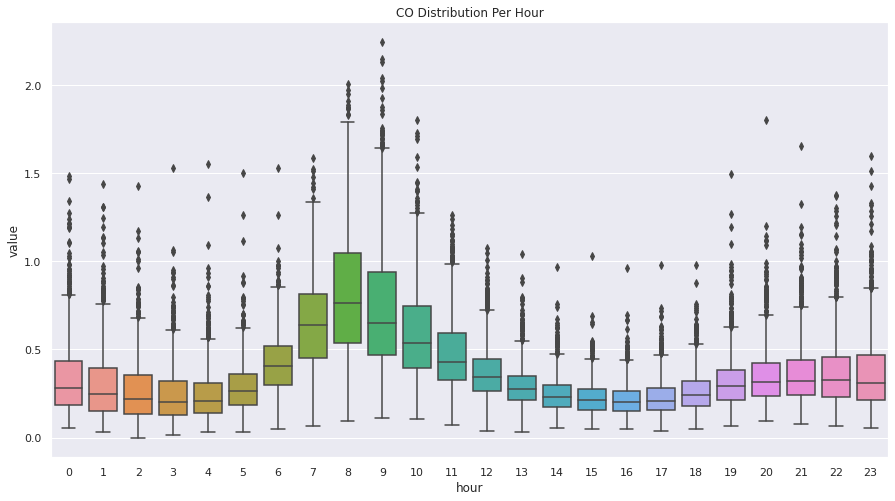

In [20]:
ax = sns.boxplot(x="hour", y="value", data=pollutants[pollutants.id_parameter=="CO"]).set_title("CO Distribution Per Hour")

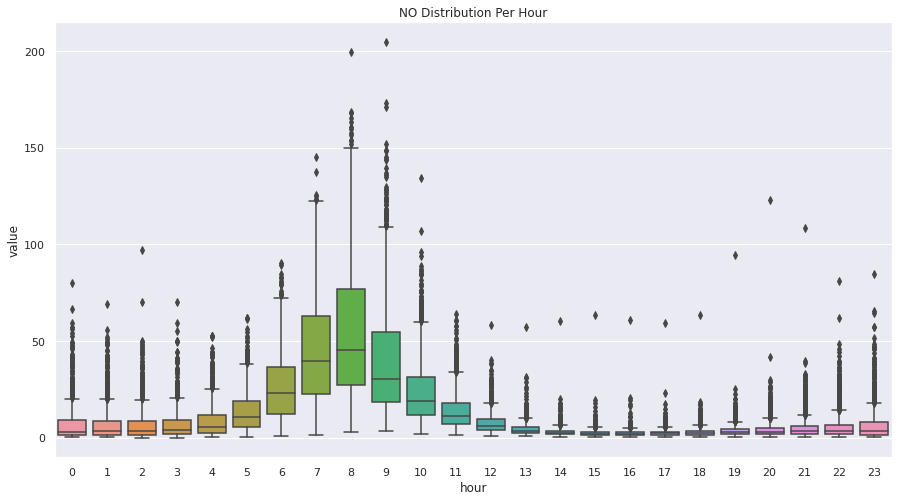

In [21]:
ax = sns.boxplot(x="hour", y="value", data=pollutants[pollutants.id_parameter=="NO"]).set_title("NO Distribution Per Hour")

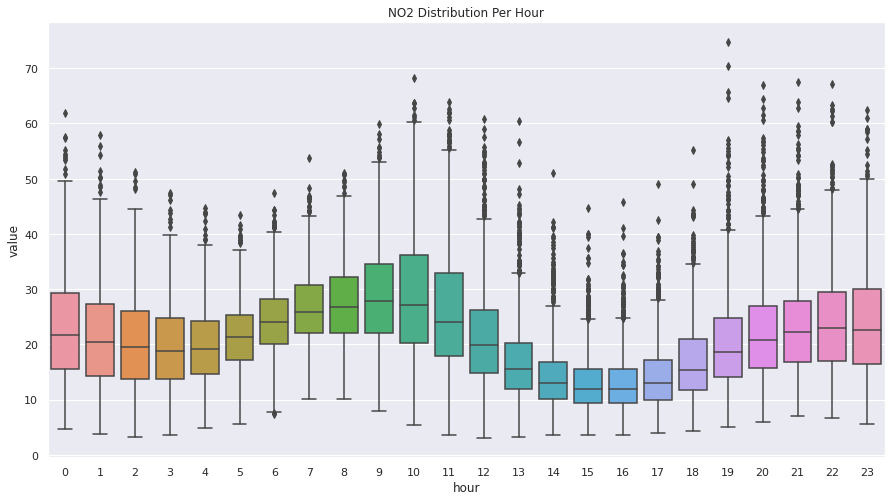

In [22]:
ax = sns.boxplot(x="hour", y="value", data=pollutants[pollutants.id_parameter=="NO2"]).set_title("NO2 Distribution Per Hour")

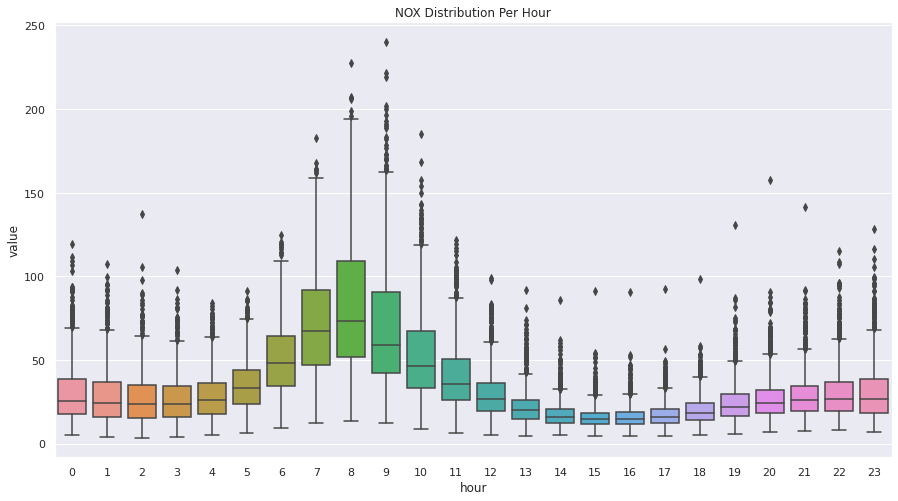

In [23]:
ax = sns.boxplot(x="hour", y="value", data=pollutants[pollutants.id_parameter=="NOX"]).set_title("NOX Distribution Per Hour")

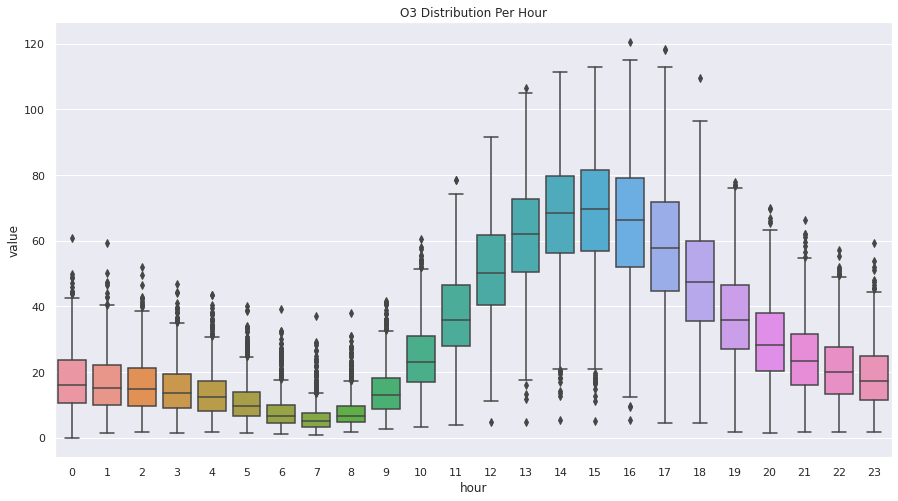

In [24]:
ax = sns.boxplot(x="hour", y="value", data=pollutants[pollutants.id_parameter=="O3"]).set_title("O3 Distribution Per Hour")

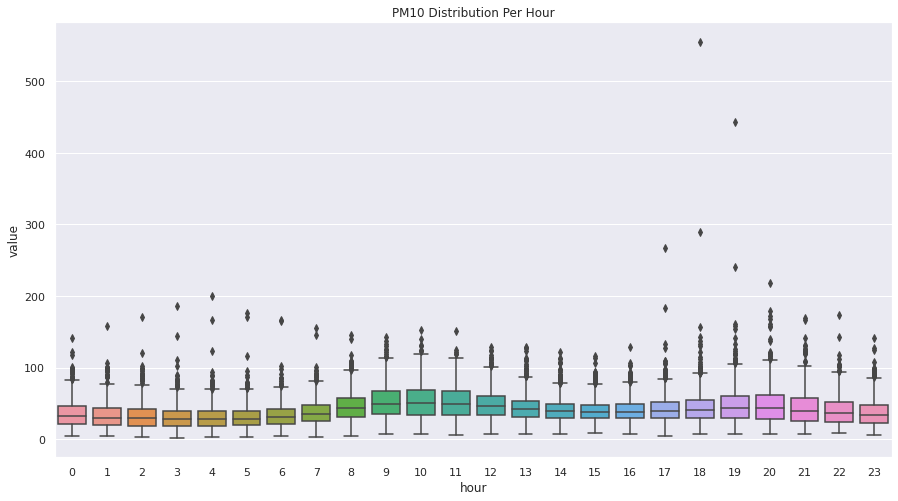

In [25]:
ax = sns.boxplot(x="hour", y="value", data=pollutants[pollutants.id_parameter=="PM10"]).set_title("PM10 Distribution Per Hour")

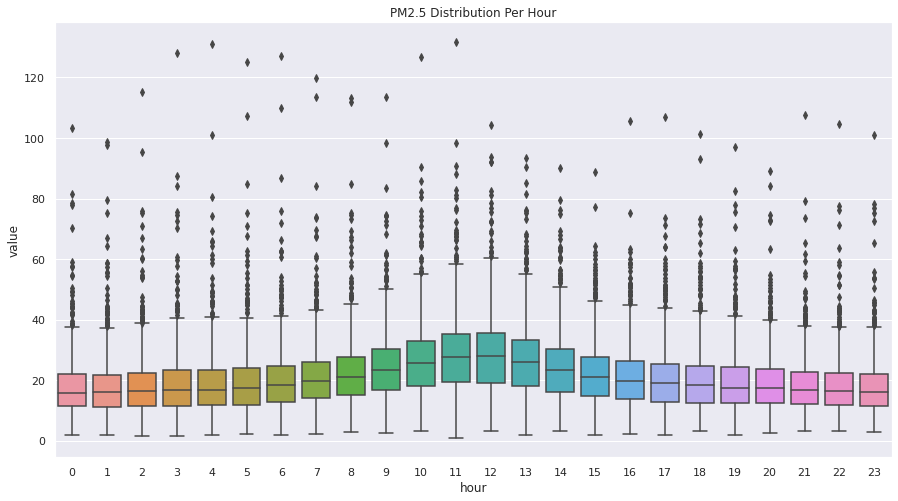

In [26]:
ax = sns.boxplot(x="hour", y="value", data=pollutants[pollutants.id_parameter=="PM2.5"]).set_title("PM2.5 Distribution Per Hour")

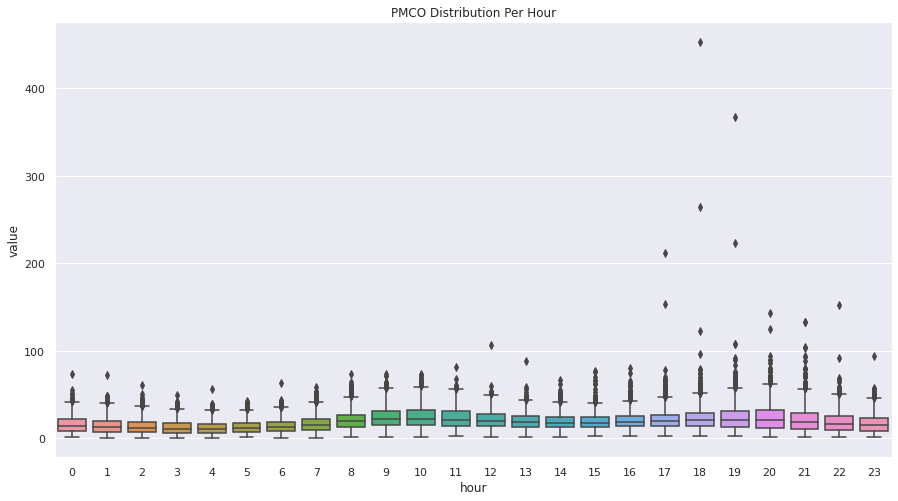

In [27]:
ax = sns.boxplot(x="hour", y="value", data=pollutants[pollutants.id_parameter=="PMCO"]).set_title("PMCO Distribution Per Hour")

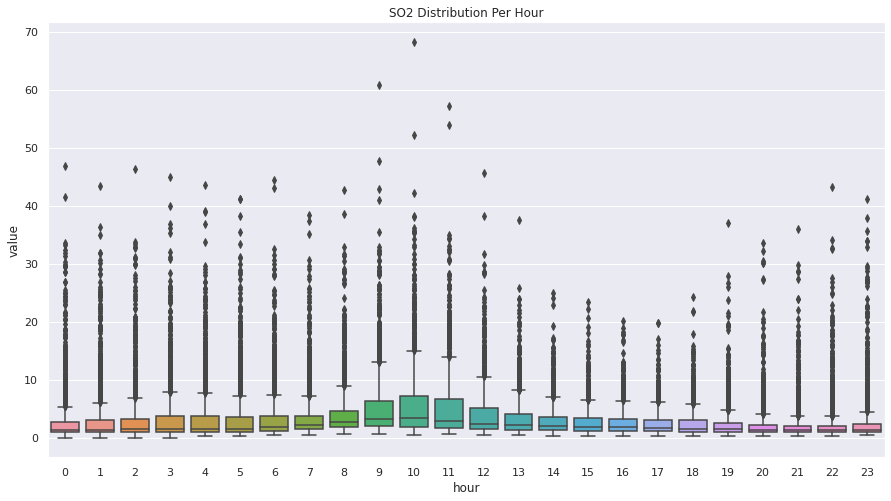

In [28]:
ax = sns.boxplot(x="hour", y="value", data=pollutants[pollutants.id_parameter=="SO2"]).set_title("SO2 Distribution Per Hour")

### Correlations

#### Heatmap (summarize per date) Pollulants and Weather (clearest colour means positive correlation, darkest colour means negative correlation)

* **There are some strong positive correlation among NOX, NO2, NO, CO. This could be give us evidence that this pollutants came from similar sources.**
* **There are a moderate positive correlation among Small Particles (PM10, PM2.5, PMCO) and  NOX, NO2, NO, CO.**
* **There are some strong positive correlation among Small Particles. This could be give us evidence that this pollutants came from similar sources.**
* **Weather has some possitive correlation with Small Particles and O3 and negative correlation with all other particles**

In [29]:
weather["DATE"] = pd.to_datetime(weather.DATE)
print(pollutants.DATE.min(), pollutants.DATE.max())
print(weather.DATE.min(), weather.DATE.max())

2018-01-01 00:00:00 2021-08-31 23:00:00
2016-01-03 00:00:00 2021-09-30 00:00:00


Range of time to compare these two dataframes will be from 2018-01-01 to 2021-09-30

Text(0.5, 1.0, 'Heatmap')

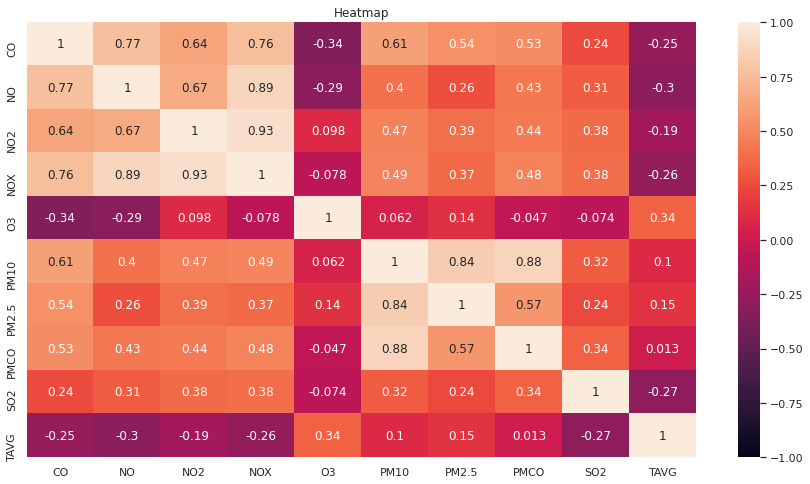

In [30]:
### I will summarize the number of particles per day just to see if there is correlation with
pollutants_perday = pollutants.groupby(["DATE", "id_parameter"])["value"].agg([("value", np.mean)]).reset_index()

pollutants_perday = pd.pivot_table(pollutants_perday, values='value', index=['DATE'],
                                   columns=['id_parameter'], aggfunc=np.mean, fill_value=0).reset_index()

pollutants_perday = pollutants_perday.merge(weather, on="DATE", how= "inner")
sns.heatmap(pollutants_perday[['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PMCO','SO2','TAVG']].corr(),
           vmin=-1, vmax=1, annot=True).set_title("Heatmap")

#### Heatmap (summarize by date)
* **Cars of Type C1, C2, C3 and C4 are the ones that has some positive correlation with CO, NO, NO2, NOX Particles**
* **Cars seem have no correlation with small particles**

In [31]:
print(pollutants.DATE.min(), pollutants.DATE.max())
print(traffic_datetime.DATE.min(), traffic_datetime.DATE.max())

2018-01-01 00:00:00 2021-08-31 23:00:00
2017-01-01 00:00:00 2020-01-31 00:00:00


Range of time to compare these two dataframes will be from 2018-01-01 to 2020-01-31

Text(0.5, 1.0, 'Heatmap')

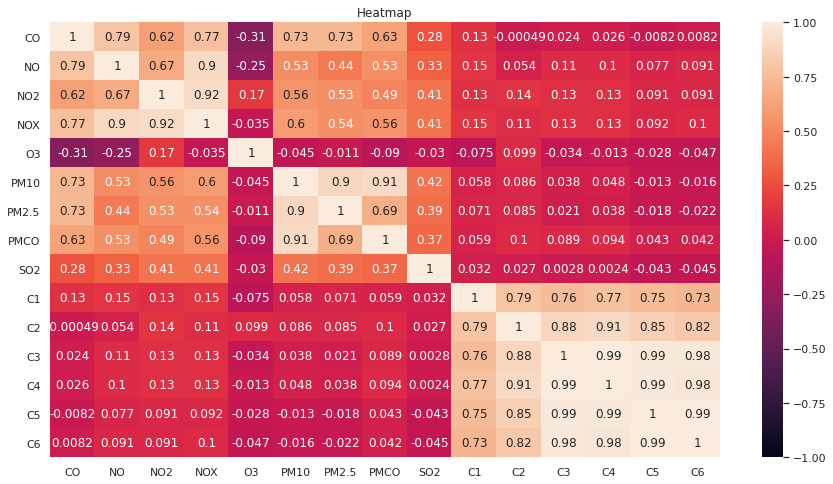

In [32]:
pollutants_perday = pollutants.groupby(["DATE", "id_parameter"])["value"].agg([("value", np.mean)]).reset_index()

pollutants_perday = pd.pivot_table(pollutants_perday, values='value', index=['DATE'],
                                   columns=['id_parameter'], aggfunc=np.mean, fill_value=0).reset_index()

pollutants_perday = pollutants_perday.merge(traffic_datetime, on="DATE", how= "inner")
sns.heatmap(pollutants_perday[['CO', 'NO', 'NO2', 'NOX', 'O3', 'PM10', 'PM2.5', 'PMCO','SO2','C1','C2',
                               "C3","C4","C5","C6"]].corr(),
            vmin=-1, vmax=1, annot=True).set_title("Heatmap")

### Conclusions

* **The particles has an increse in the composition of the air at some times of the day, this is interesting because if we find some evidence that this is by human or industry daily basis activities we could propose some regulations or stimulus to try mitigate these increases**

* **Cars are a pretty interesting topic, because in Mexico City there are some regulations about which cars could be in circulation some days (specially with high pollution), these regulations take days to mitigate the pollution in the air. We have to understand if these regulations are effective per se or by some collateral effect.**

### What is the next?

* **Add more data as Metro and Metrobus number of passengers (Right now there is a problem in the website with data before 2021)**

* **Use Geo-spacial properties of data to create dynamic dashboards**

* **Add data of industry activities and impact in pollution**

* **Make some hypotesis and test them to propose stimulus or regulations to reduce the pollution**